<a href="https://www.kaggle.com/code/patilaakash619/electric-vehicle-population-data-in-the-us?scriptVersionId=227615875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Import Libraries 🛠️</h2>
</div>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")

<a id="2"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Load and Explore Data 📊</h2>
</div>

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/ev-bhebic-c/Electric Vehicle Population Data.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Data types and missing values
print("\nData Info:")
df.info()

Dataset Shape: (232230, 17)

First 5 rows of the dataset:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-

<a id="3"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Check Missing Values and Statistics 🔍</h2>
</div

In [3]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Display basic statistics for numerical features
print("\nNumerical Features Statistics:")
display(df.describe())

# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count < 20:  # Only display if number of unique values is manageable
        print(f"\n{col} - {unique_count} unique values:")
        print(df[col].value_counts().head())
    else:
        print(f"\n{col} - {unique_count} unique values (too many to display)")

Missing Values:
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

N

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10



VIN (1-10) - 13560 unique values (too many to display)

County - 209 unique values (too many to display)

City - 786 unique values (too many to display)

State - 49 unique values (too many to display)

Make - 46 unique values (too many to display)

Model - 170 unique values (too many to display)

Electric Vehicle Type - 2 unique values:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            184054
Plug-in Hybrid Electric Vehicle (PHEV)     48176
Name: count, dtype: int64

Clean Alternative Fuel Vehicle (CAFV) Eligibility - 3 unique values:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    136865
Clean Alternative Fuel Vehicle Eligible                          72847
Not eligible due to low battery range                            22518
Name: count, dtype: int64

Vehicle Location - 948 unique values (too many to display)

Electric Utility - 76 unique values (too many to display)


<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Data Cleaning and Preprocessing 🧹</h2>
</div>

In [4]:
# Fix data types if needed and handle missing values
df_clean = df.copy()

# Handle missing values
df_clean['County'].fillna('Unknown', inplace=True)
df_clean['City'].fillna('Unknown', inplace=True)
df_clean['Postal Code'].fillna(df_clean['Postal Code'].median(), inplace=True)
df_clean['Electric Range'].fillna(df_clean['Electric Range'].median(), inplace=True)
df_clean['Base MSRP'].fillna(df_clean['Base MSRP'].median(), inplace=True)
df_clean['Legislative District'].fillna(df_clean['Legislative District'].median(), inplace=True)
df_clean['Vehicle Location'].fillna('Unknown', inplace=True)
df_clean['Electric Utility'].fillna('Unknown', inplace=True)
df_clean['2020 Census Tract'].fillna(df_clean['2020 Census Tract'].median(), inplace=True)

# Check if there are any remaining missing values
print("Remaining missing values after cleaning:")
print(df_clean.isnull().sum())

# Check for outliers in numeric columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary of numeric columns after cleaning:")
display(df_clean[numeric_cols].describe())

# Create a new binary feature: Is the vehicle fully electric?
df_clean['Is_BEV'] = df_clean['Electric Vehicle Type'].apply(
    lambda x: 1 if x == 'Battery Electric Vehicle (BEV)' else 0
)

print("\nSample of data after preprocessing:")
display(df_clean.head())

Remaining missing values after cleaning:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Summary of

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232230.000000,232230.000000,232230.000000,232230.000000,232230.000000,2.322300e+05,2.322300e+05
mean,98180.171111,2021.353727,46.750562,803.715519,28.887439,2.343671e+08,5.298177e+10
std,2489.386514,2.994884,84.370197,7246.181011,14.889735,6.831418e+07,1.507801e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10



Sample of data after preprocessing:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Is_BEV
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,0
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10,0
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10,1


<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Exploratory Data Analysis (EDA) - Univariate Analysis 📈</h2>
</div>

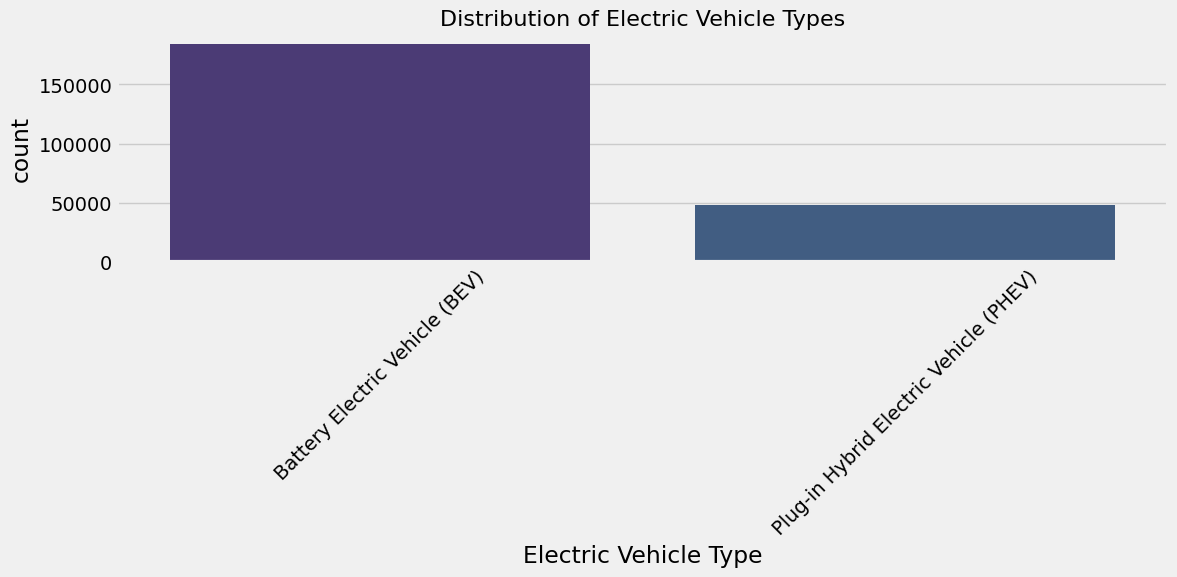

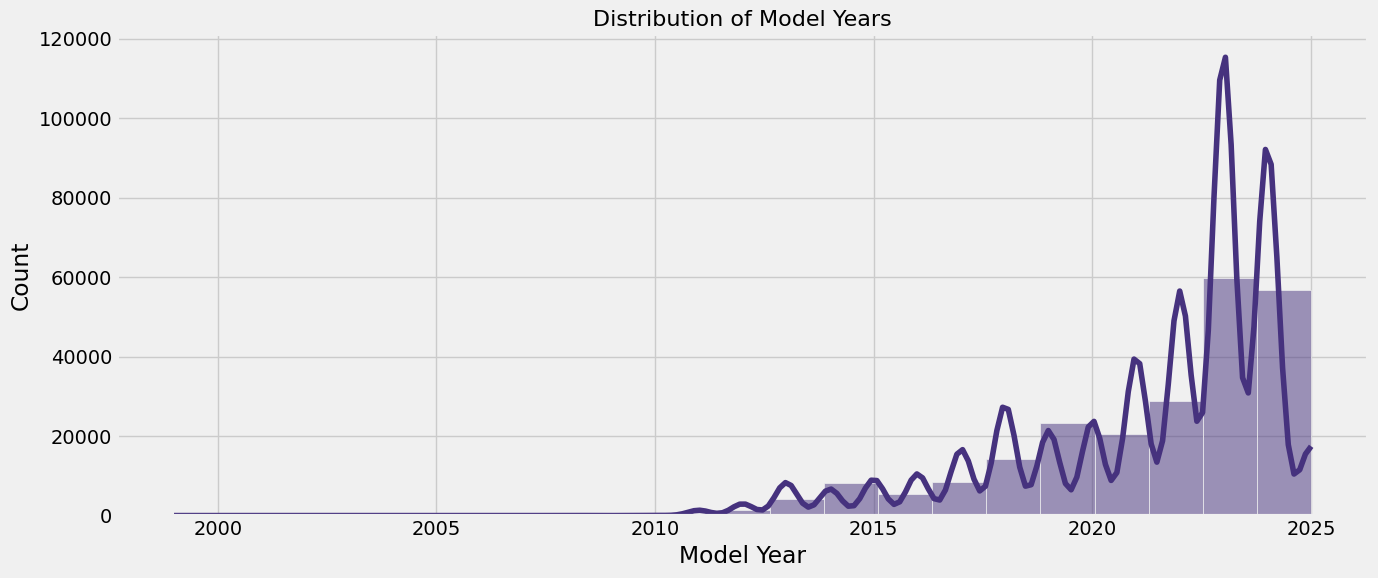

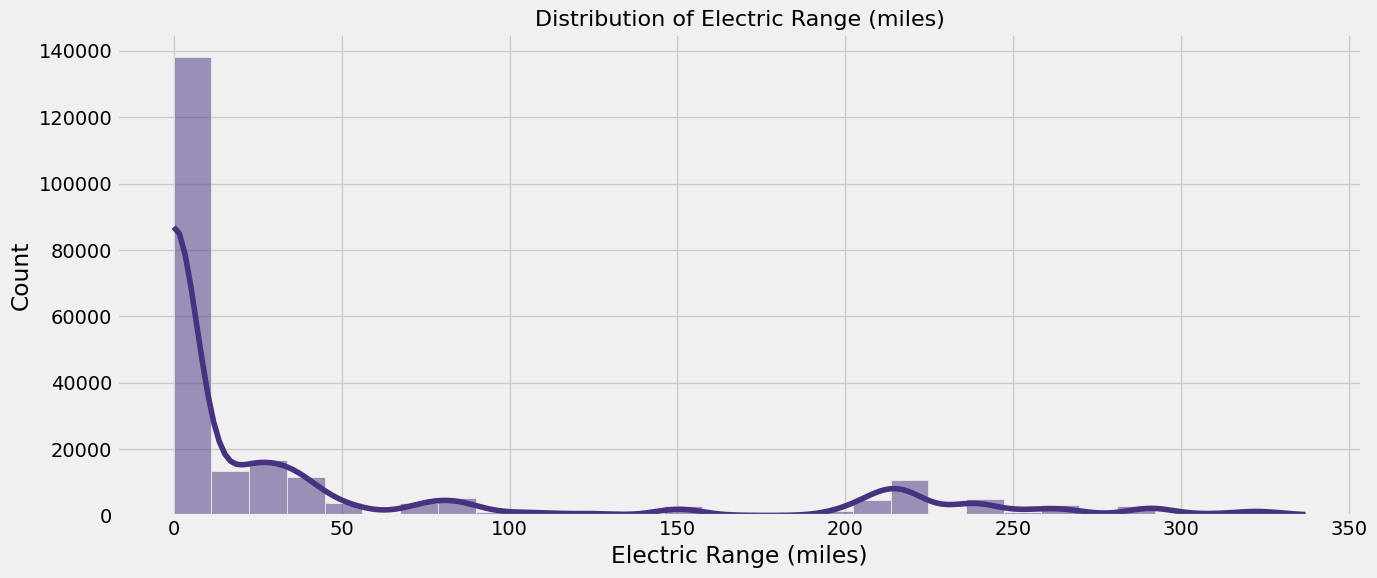

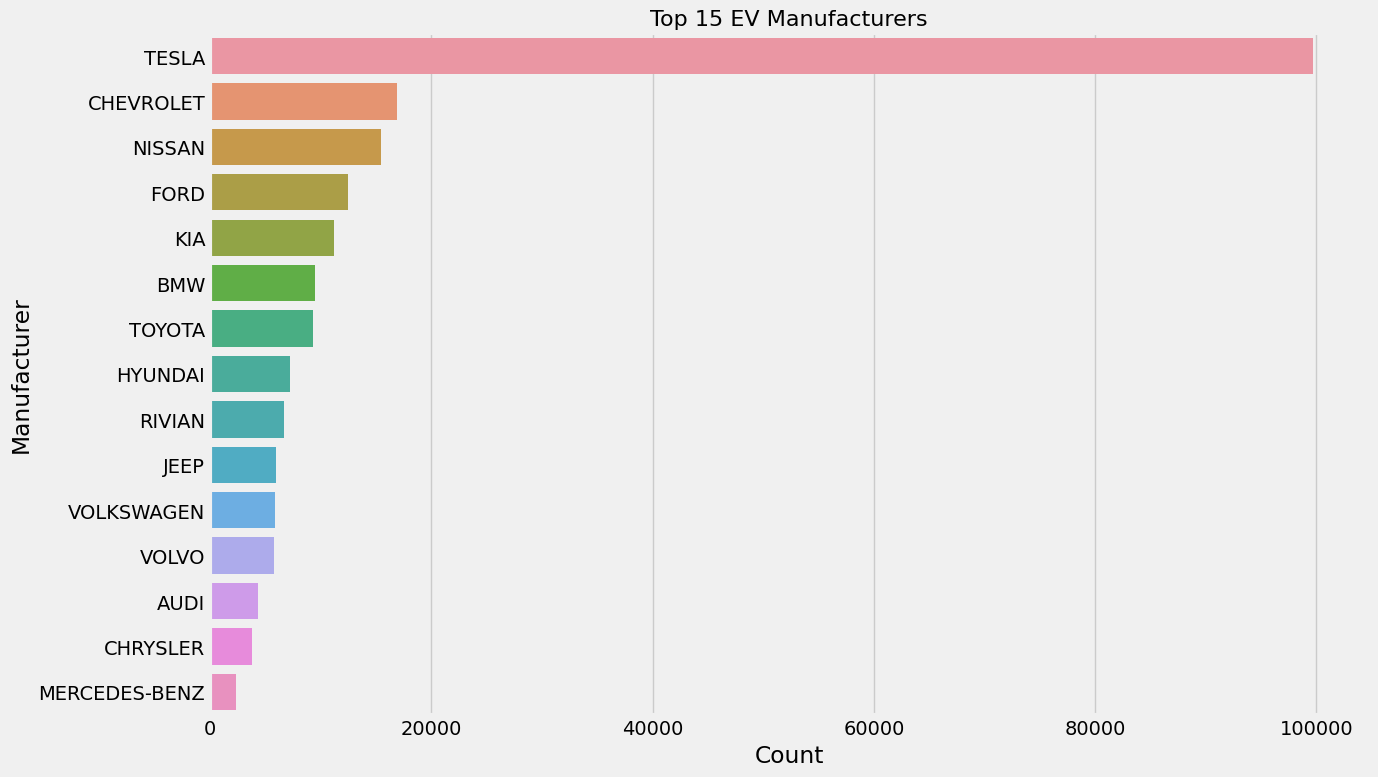

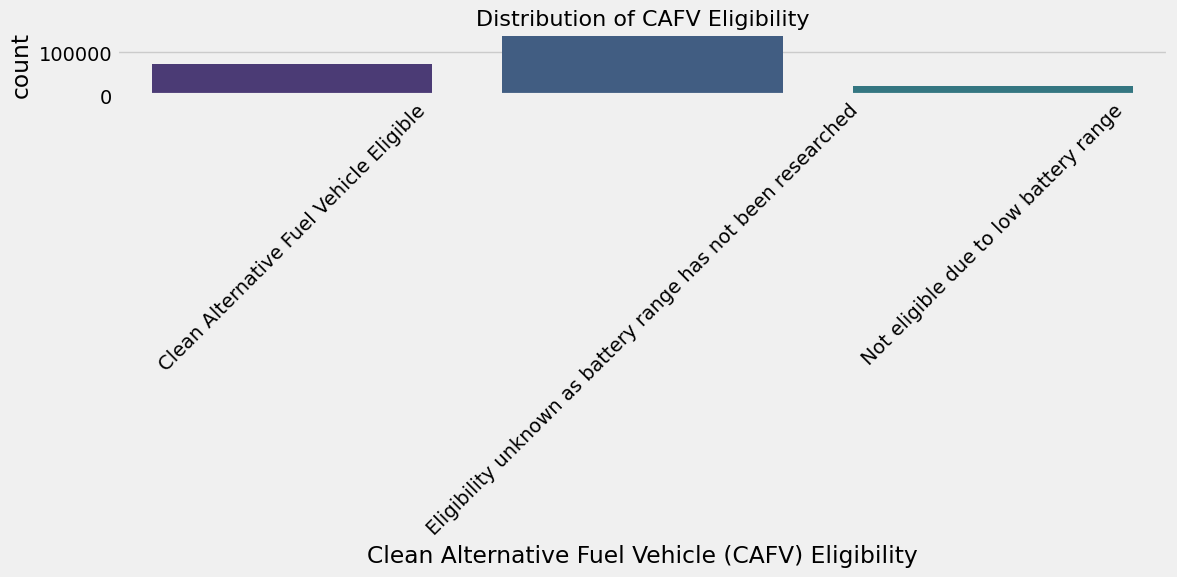

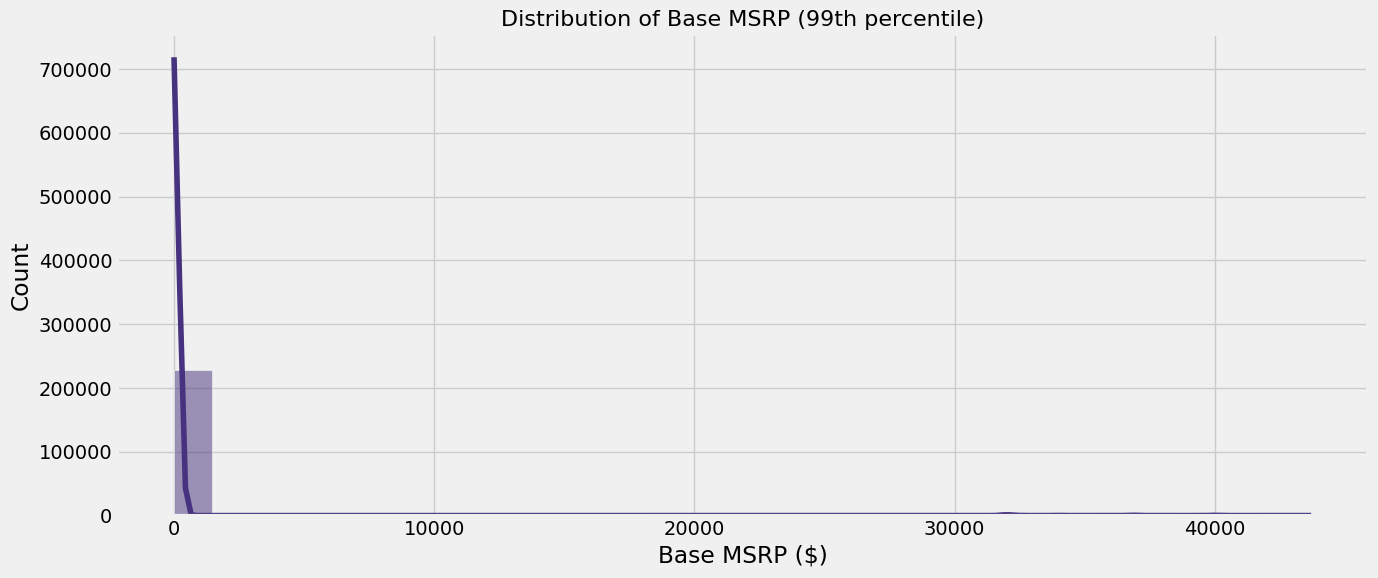

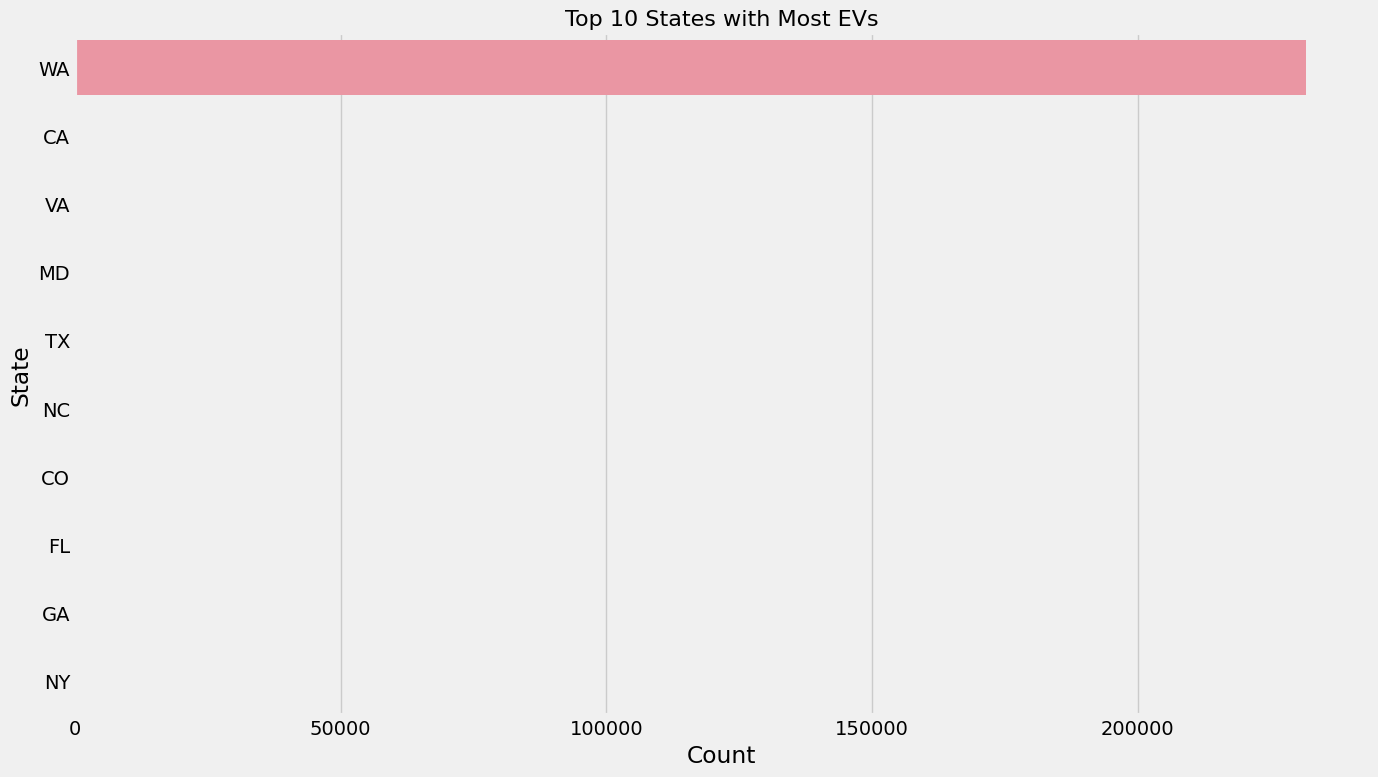

In [5]:
# Distribution of Electric Vehicle Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Model Years
plt.figure(figsize=(14, 6))
sns.histplot(data=df_clean, x='Model Year', kde=True, bins=df_clean['Model Year'].nunique())
plt.title('Distribution of Model Years', fontsize=16)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution of Electric Range
plt.figure(figsize=(14, 6))
sns.histplot(data=df_clean, x='Electric Range', kde=True, bins=30)
plt.title('Distribution of Electric Range (miles)', fontsize=16)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Top Manufacturers
plt.figure(figsize=(14, 8))
top_makes = df_clean['Make'].value_counts().head(15)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 15 EV Manufacturers', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

# Distribution of CAFV Eligibility
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Distribution of CAFV Eligibility', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Base MSRP (with outliers removed for better visualization)
plt.figure(figsize=(14, 6))
msrp_filtered = df_clean[df_clean['Base MSRP'] < df_clean['Base MSRP'].quantile(0.99)]
sns.histplot(data=msrp_filtered, x='Base MSRP', kde=True, bins=30)
plt.title('Distribution of Base MSRP (99th percentile)', fontsize=16)
plt.xlabel('Base MSRP ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Top States (if data contains multiple states)
if df_clean['State'].nunique() > 1:
    plt.figure(figsize=(14, 8))
    top_states = df_clean['State'].value_counts().head(10)
    sns.barplot(x=top_states.values, y=top_states.index)
    plt.title('Top 10 States with Most EVs', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

<a id="6"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6: Exploratory Data Analysis (EDA) - Bivariate Analysis 🔄</h2>
</div>

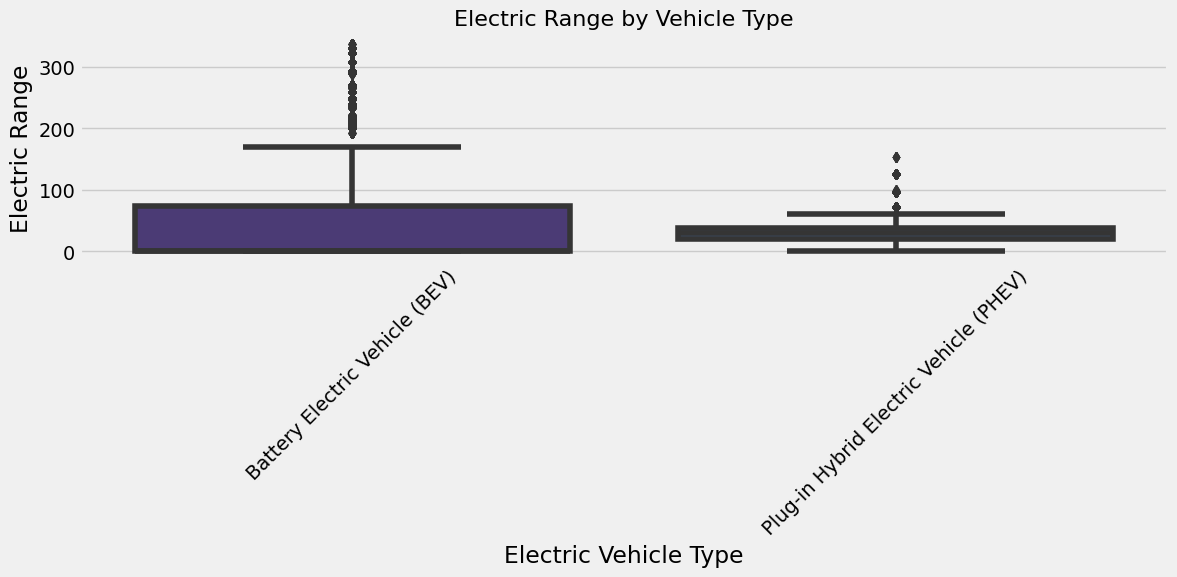

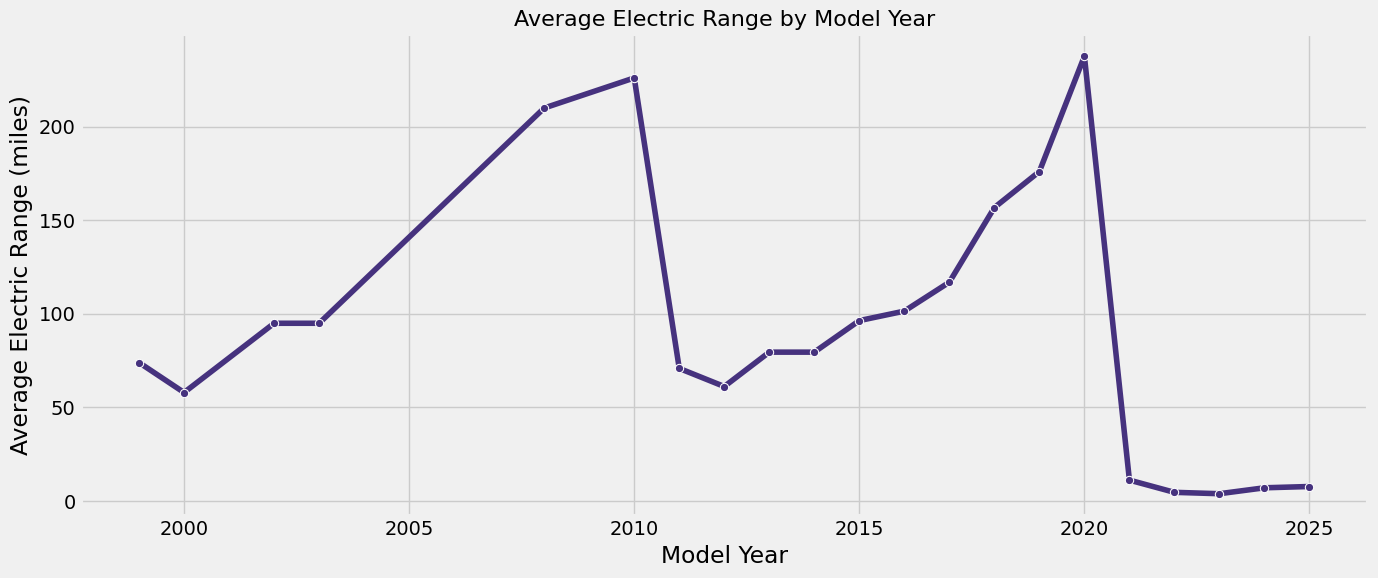

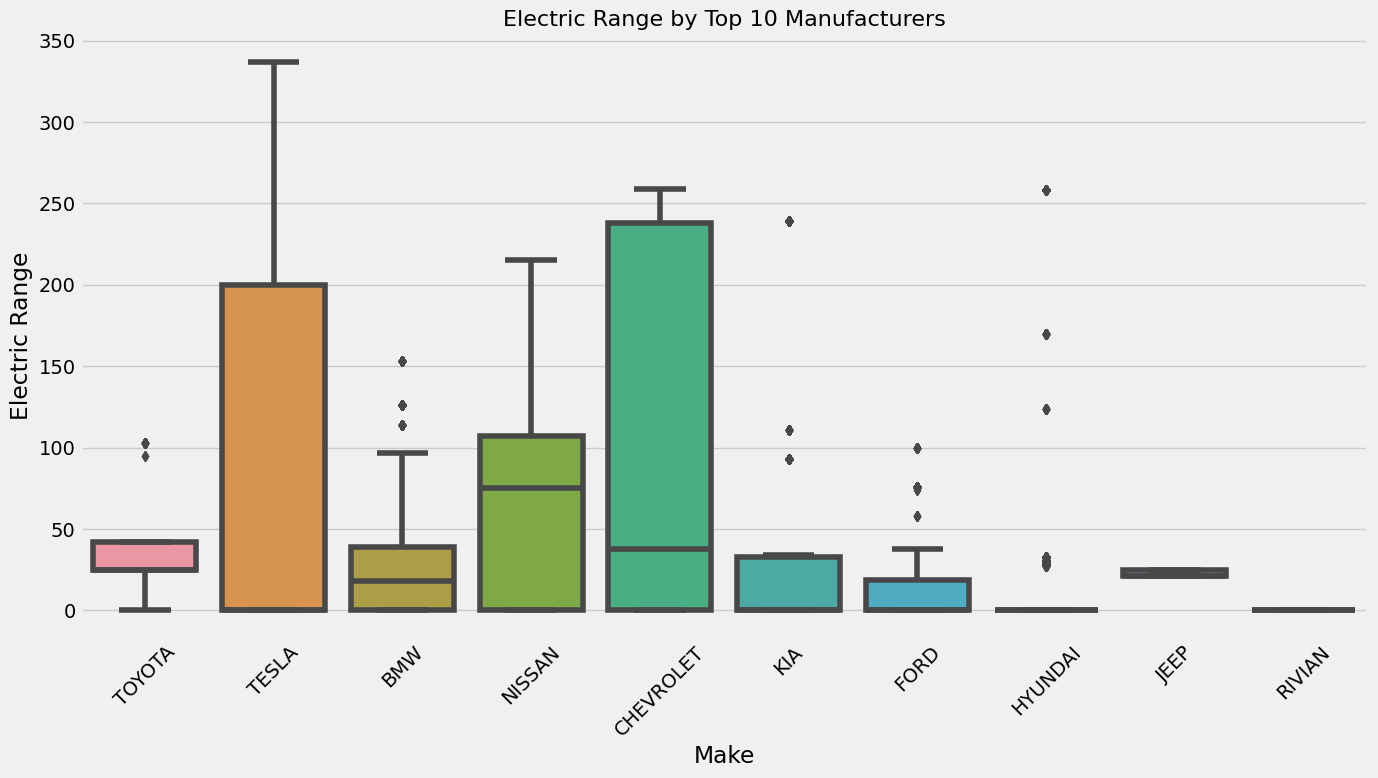

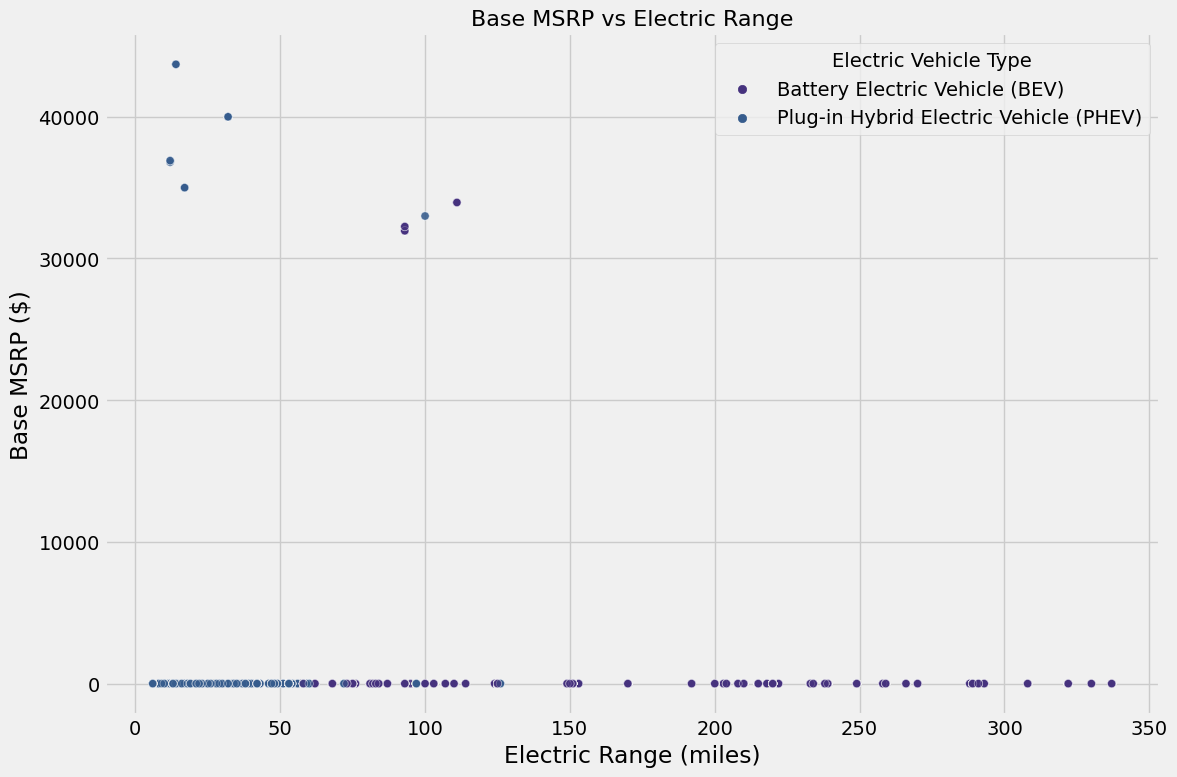

<Figure size 1400x800 with 0 Axes>

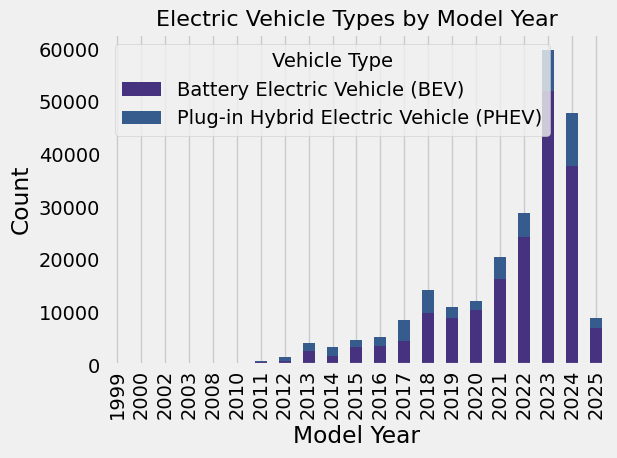

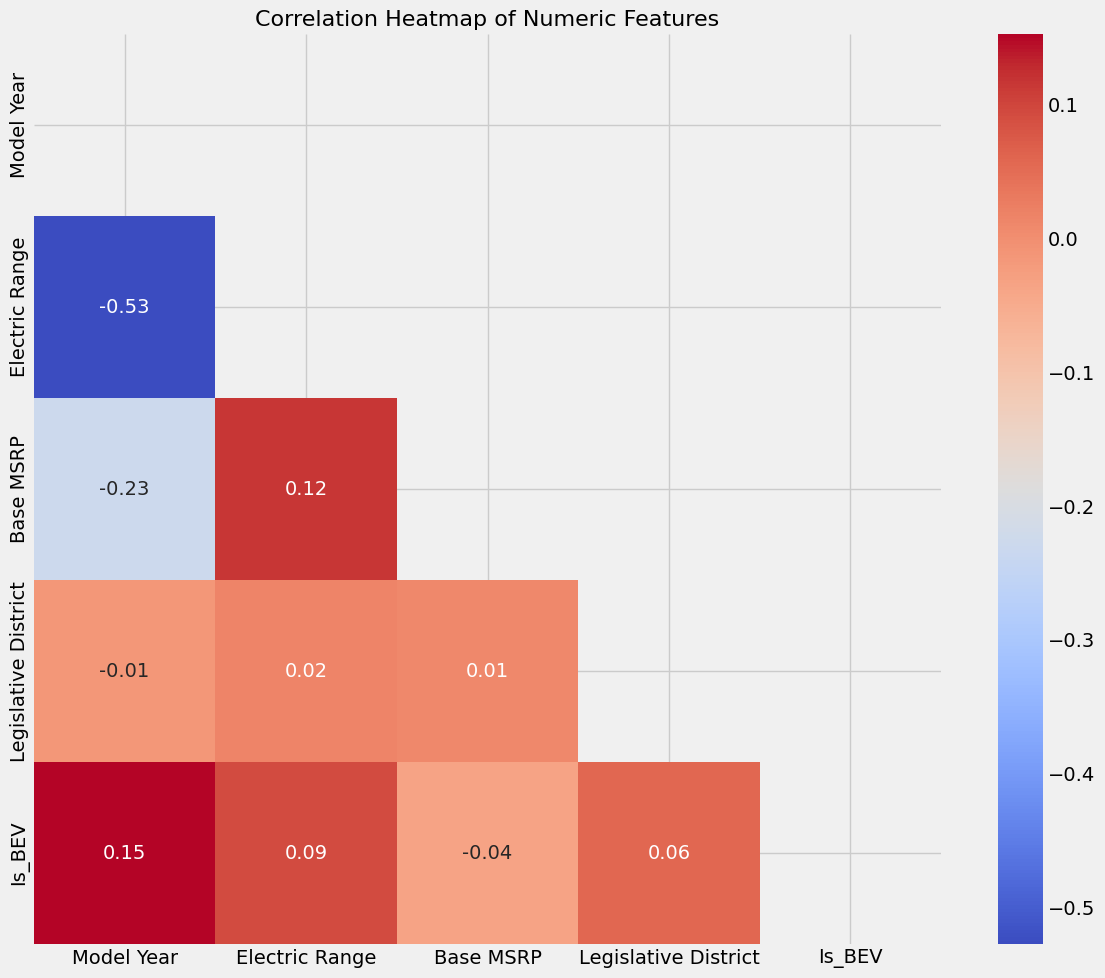

In [6]:
# Electric Range by Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Electric Vehicle Type', y='Electric Range')
plt.title('Electric Range by Vehicle Type', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Electric Range by Model Year
plt.figure(figsize=(14, 6))
range_by_year = df_clean.groupby('Model Year')['Electric Range'].mean().reset_index()
sns.lineplot(data=range_by_year, x='Model Year', y='Electric Range', marker='o')
plt.title('Average Electric Range by Model Year', fontsize=16)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Electric Range by Make (top 10 manufacturers)
plt.figure(figsize=(14, 8))
top_10_makes = df_clean['Make'].value_counts().head(10).index
range_by_make = df_clean[df_clean['Make'].isin(top_10_makes)]
sns.boxplot(data=range_by_make, x='Make', y='Electric Range')
plt.title('Electric Range by Top 10 Manufacturers', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSRP vs Electric Range
plt.figure(figsize=(12, 8))
# Filter out extreme outliers for better visualization
filtered_df = df_clean[(df_clean['Base MSRP'] < df_clean['Base MSRP'].quantile(0.99)) & 
                        (df_clean['Electric Range'] > 0)]
sns.scatterplot(data=filtered_df, x='Electric Range', y='Base MSRP', alpha=0.5, hue='Electric Vehicle Type')
plt.title('Base MSRP vs Electric Range', fontsize=16)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.tight_layout()
plt.show()

# Vehicle Type by Model Year
plt.figure(figsize=(14, 8))
ev_type_by_year = df_clean.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack()
ev_type_by_year.plot(kind='bar', stacked=True)
plt.title('Electric Vehicle Types by Model Year', fontsize=16)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
# Remove columns that don't make sense for correlation
cols_to_drop = ['DOL Vehicle ID', '2020 Census Tract', 'Postal Code']
numeric_df = numeric_df.drop(columns=[col for col in cols_to_drop if col in numeric_df.columns])
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

<a id="7"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 7: Feature Engineering 🔧</h2>
</div>

Sample with new engineered features:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Is_BEV,Price_Category,Range_Category,Vehicle_Age,Model_Base,Is_Popular_Make
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1,NaN,Low,11,RAV4,0
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1,NaN,Medium,6,MODEL,1
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,0,NaN,Very Low,0,X5,0
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10,0,NaN,Very Low,1,RAV4,0
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10,1,NaN,NaN,4,MODEL,1


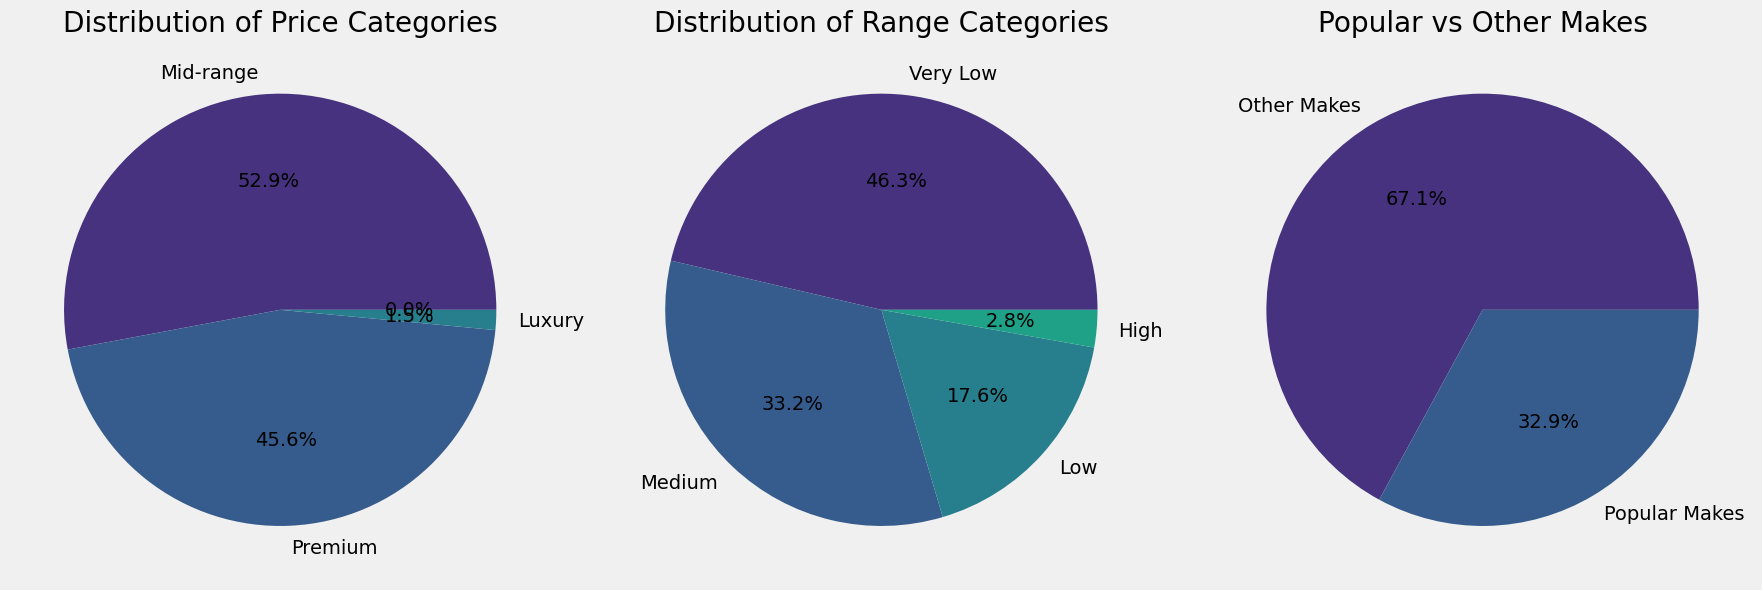

In [7]:
# Create additional useful features
df_features = df_clean.copy()

# Create price categories
df_features['Price_Category'] = pd.cut(
    df_features['Base MSRP'], 
    bins=[0, 30000, 60000, 100000, float('inf')],
    labels=['Budget', 'Mid-range', 'Premium', 'Luxury']
)

# Create range categories
df_features['Range_Category'] = pd.cut(
    df_features['Electric Range'], 
    bins=[0, 50, 150, 300, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

# Create vehicle age feature
current_year = 2025  # As per your dataset which has vehicles up to 2025
df_features['Vehicle_Age'] = current_year - df_features['Model Year']

# Aggregate models by grouping similar models
# Example: consolidate "Model S", "Model S Performance" into "Model S"
df_features['Model_Base'] = df_features['Model'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)

# Create feature for common manufacturers
top_5_makes = df_features['Make'].value_counts().head(5).index
df_features['Is_Popular_Make'] = df_features['Make'].apply(lambda x: 1 if x in top_5_makes else 0)

# Display the new features
print("Sample with new engineered features:")
display(df_features.head())

# Check the distribution of the new categorical features
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
df_features['Price_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Price Categories')
plt.ylabel('')

plt.subplot(1, 3, 2)
df_features['Range_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Range Categories')
plt.ylabel('')

plt.subplot(1, 3, 3)
df_features['Is_Popular_Make'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Other Makes', 'Popular Makes'])
plt.title('Popular vs Other Makes')
plt.ylabel('')

plt.tight_layout()
plt.show()

<a id="8"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 8: Define Modeling Task and Prepare Data 📋</h2>
</div>

In [8]:
# Let's define two modeling tasks:
# 1. Regression Task: Predict the Electric Range of a vehicle
# 2. Classification Task: Predict if a vehicle is a BEV (Battery Electric Vehicle) or PHEV

# Prepare data for modeling

# Feature selection for both tasks
regression_features = [
    'Model Year', 'Base MSRP', 'Vehicle_Age', 'Is_Popular_Make',
    'Make', 'Electric Vehicle Type'  # Categorical features to be encoded
]

classification_features = [
    'Model Year', 'Base MSRP', 'Electric Range', 'Vehicle_Age', 'Is_Popular_Make',
    'Make'  # Categorical features to be encoded
]

# Select relevant columns for each task
X_regression = df_features[regression_features].copy()
y_regression = df_features['Electric Range']

X_classification = df_features[classification_features].copy()
y_classification = df_features['Is_BEV']

# Split the data for both tasks
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Print the shapes of training and testing sets
print("Regression Task - Training set shape:", X_reg_train.shape)
print("Regression Task - Testing set shape:", X_reg_test.shape)
print("Classification Task - Training set shape:", X_clf_train.shape)
print("Classification Task - Testing set shape:", X_clf_test.shape)

# Check class balance for classification task
print("\nClass distribution in classification task:")
print(y_clf_train.value_counts(normalize=True) * 100)

Regression Task - Training set shape: (185784, 6)
Regression Task - Testing set shape: (46446, 6)
Classification Task - Training set shape: (185784, 6)
Classification Task - Testing set shape: (46446, 6)

Class distribution in classification task:
Is_BEV
1    79.30177
0    20.69823
Name: proportion, dtype: float64


<a id="9"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 9: Build Regression Model Pipeline 🚀</h2>
</div>

In [9]:
# Identify categorical and numerical columns
categorical_cols_reg = X_reg_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols_reg = X_reg_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols_reg),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols_reg)
    ]
)

# Create and train Linear Regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])

print("Training Linear Regression model...")
lr_pipeline.fit(X_reg_train, y_reg_train)
lr_train_score = lr_pipeline.score(X_reg_train, y_reg_train)
lr_test_score = lr_pipeline.score(X_reg_test, y_reg_test)
lr_pred = lr_pipeline.predict(X_reg_test)
lr_mse = mean_squared_error(y_reg_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)

print(f"Linear Regression - Train R² score: {lr_train_score:.4f}")
print(f"Linear Regression - Test R² score: {lr_test_score:.4f}")
print(f"Linear Regression - RMSE: {lr_rmse:.4f}")

# Create and train Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

print("\nTraining Random Forest model...")
rf_pipeline.fit(X_reg_train, y_reg_train)
rf_train_score = rf_pipeline.score(X_reg_train, y_reg_train)
rf_test_score = rf_pipeline.score(X_reg_test, y_reg_test)
rf_pred = rf_pipeline.predict(X_reg_test)
rf_mse = mean_squared_error(y_reg_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - Train R² score: {rf_train_score:.4f}")
print(f"Random Forest - Test R² score: {rf_test_score:.4f}")
print(f"Random Forest - RMSE: {rf_rmse:.4f}")

# Create and train Gradient Boosting model
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

print("\nTraining Gradient Boosting model...")
gb_pipeline.fit(X_reg_train, y_reg_train)
gb_train_score = gb_pipeline.score(X_reg_train, y_reg_train)
gb_test_score = gb_pipeline.score(X_reg_test, y_reg_test)
gb_pred = gb_pipeline.predict(X_reg_test)
gb_mse = mean_squared_error(y_reg_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting - Train R² score: {gb_train_score:.4f}")
print(f"Gradient Boosting - Test R² score: {gb_test_score:.4f}")
print(f"Gradient Boosting - RMSE: {gb_rmse:.4f}")

# Compare models
models_comparison_reg = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train R²': [lr_train_score, rf_train_score, gb_train_score],
    'Test R²': [lr_test_score, rf_test_score, gb_test_score],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse]
})

print("\nRegression Models Comparison:")
display(models_comparison_reg)

Training Linear Regression model...
Linear Regression - Train R² score: 0.3732
Linear Regression - Test R² score: 0.3743
Linear Regression - RMSE: 66.6655

Training Random Forest model...
Random Forest - Train R² score: 0.9874
Random Forest - Test R² score: 0.9879
Random Forest - RMSE: 9.2807

Training Gradient Boosting model...
Gradient Boosting - Train R² score: 0.9753
Gradient Boosting - Test R² score: 0.9762
Gradient Boosting - RMSE: 13.0037

Regression Models Comparison:


,Model,Train R²,Test R²,RMSE
0,Linear Regression,0.373246,0.374283,66.665453
1,Random Forest,0.987372,0.987873,9.280732
2,Gradient Boosting,0.975344,0.976193,13.003717


<a id="10"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 10: Build Classification Model Pipeline 🚀</h2>
</div>

Training Logistic Regression model...
Logistic Regression - Train accuracy: 0.9278
Logistic Regression - Test accuracy: 0.9263

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      9722
           1       0.94      0.96      0.95     36724

    accuracy                           0.93     46446
   macro avg       0.90      0.87      0.89     46446
weighted avg       0.92      0.93      0.93     46446


Training Random Forest classification model...
Random Forest - Train accuracy: 0.9998
Random Forest - Test accuracy: 0.9999

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9722
           1       1.00      1.00      1.00     36724

    accuracy                           1.00     46446
   macro avg       1.00      1.00      1.00     46446
weighted avg       1.00      1.00      1.00     46446


Classif

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.927755,0.926302
1,Random Forest,0.999828,0.999914


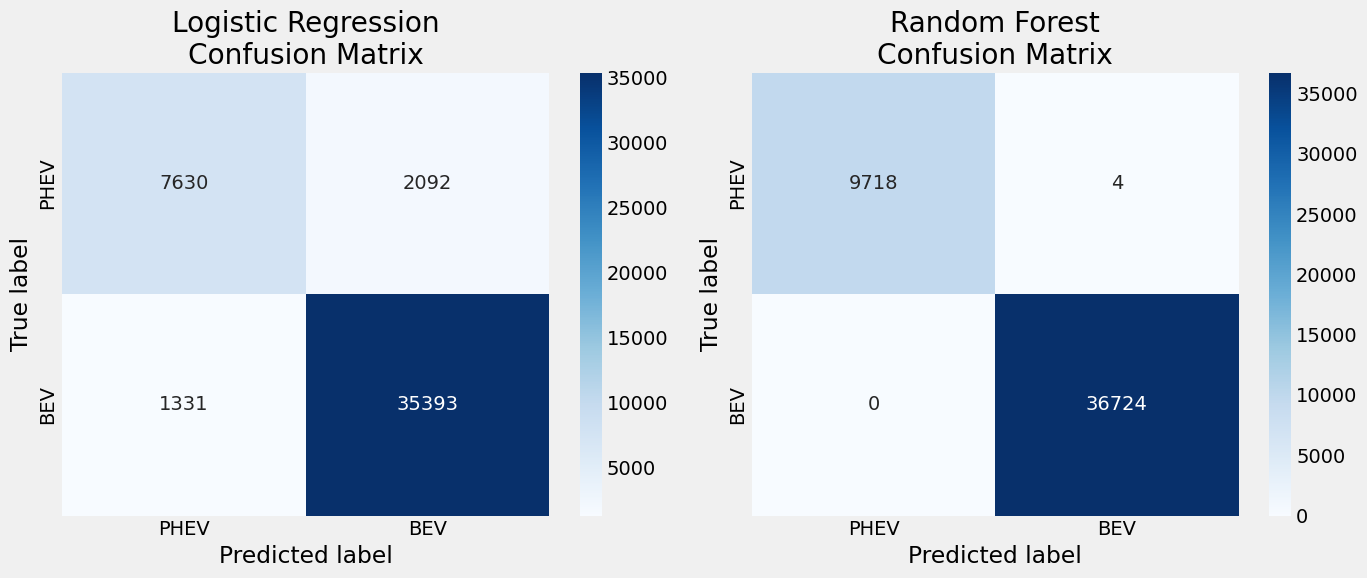

In [10]:
# Identify categorical and numerical columns for classification
categorical_cols_clf = X_clf_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols_clf = X_clf_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor for classification
preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols_clf),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols_clf)
    ]
)

# Create and train Logistic Regression model
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

print("Training Logistic Regression model...")
log_pipeline.fit(X_clf_train, y_clf_train)
log_train_score = log_pipeline.score(X_clf_train, y_clf_train)
log_test_score = log_pipeline.score(X_clf_test, y_clf_test)
log_pred = log_pipeline.predict(X_clf_test)

print(f"Logistic Regression - Train accuracy: {log_train_score:.4f}")
print(f"Logistic Regression - Test accuracy: {log_test_score:.4f}")
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_clf_test, log_pred))

# Create and train Random Forest model for classification
rf_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

print("\nTraining Random Forest classification model...")
rf_clf_pipeline.fit(X_clf_train, y_clf_train)
rf_clf_train_score = rf_clf_pipeline.score(X_clf_train, y_clf_train)
rf_clf_test_score = rf_clf_pipeline.score(X_clf_test, y_clf_test)
rf_clf_pred = rf_clf_pipeline.predict(X_clf_test)

print(f"Random Forest - Train accuracy: {rf_clf_train_score:.4f}")
print(f"Random Forest - Test accuracy: {rf_clf_test_score:.4f}")
print("\nClassification Report - Random Forest:")
print(classification_report(y_clf_test, rf_clf_pred))

# Compare models
models_comparison_clf = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train Accuracy': [log_train_score, rf_clf_train_score],
    'Test Accuracy': [log_test_score, rf_clf_test_score]
})

print("\nClassification Models Comparison:")
display(models_comparison_clf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression confusion matrix
log_cm = confusion_matrix(y_clf_test, log_pred)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_xticklabels(['PHEV', 'BEV'])
axes[0].set_yticklabels(['PHEV', 'BEV'])

# Random Forest confusion matrix
rf_cm = confusion_matrix(y_clf_test, rf_clf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest\nConfusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_xticklabels(['PHEV', 'BEV'])
axes[1].set_yticklabels(['PHEV', 'BEV'])

plt.tight_layout()
plt.show()

<div style="background-color: #d9edf7; border-left: 6px solid #31708f; padding: 15px; font-family: Arial, sans-serif;">
    <h2 style="text-align: center; color: #3c3c3c;">
        🚀 Found my analysis and notebook useful? 
    </h2>
    <p style="text-align: center; color: #555;">
        Your feedback would mean the world! 💬 If my work has been helpful, please consider dropping a comment and an upvote. 
        <strong>Your support fuels my drive to create even better insights! 🌟</strong>
    </p>
</div>